# PREDICTING CHURN IN TELECOM

### DATA QUESTION


As you probably guessed from the title of the dataset, this model aims to predict churn — a very common problem businesses face.

Thinking about which metrics we want to use to evaluate our model, let’s think about what we want our model to predict and what is worse: a false negative prediction or a false positive prediction.

Our model should predict whether a customer in our dataset will stay with the company(False) or if they will leave (True).

In this scenario, we have:

    False negative: the model predicts that a customer stays with the company (False), when in fact that customer churns (True).

    False positive: the model predicts that a customer will churn (True), when in fact they will stay(False).

Given this, we would probably argue that false negatives are more costly to the company as it would be a missed opportunity to market towards keeping those customers. For this reason, we will use accuracy and recall scores to evaluate our model performance.

In [1]:
# Load the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import pandas_profiling as pf
pd.set_option('display.max_column', 60)
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
print('complete')

complete


In [2]:
# load the dataset
data = pd.read_csv(r'C:\Users\ABDULAZEEZ R.O\Desktop\1\SQL&TABLEAU\Churn in Telecom.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [139]:
# sorting the data by 'area code' columns
data.sort_values(by = 'area code', ascending = False).head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
835,GA,27,510,403-6850,no,no,0,72.7,75,12.36,208.6,117,17.73,65.8,71,2.96,9.9,3,2.67,1,False
2392,WY,90,510,400-8069,no,no,0,125.4,158,21.32,269.1,83,22.87,238.6,103,10.74,11.0,7,2.97,1,False
2383,ID,68,510,403-9199,no,yes,30,122.9,93,20.89,233.5,91,19.85,199.5,144,8.98,9.6,2,2.59,2,False


In [107]:
data['area code'].sort_values(ascending = False).head(3)

869     510
2396    510
2388    510
Name: area code, dtype: int64

In [108]:
# checking the size of the dataset
rows, cols = data.shape
print(f'The number of rows in our dataset are {rows} \nWhile the number of columns are {cols}')

The number of rows in our dataset are 3333 
While the number of columns are 21


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [6]:
# display the columns
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [140]:
# let's replace the spaces between our columns name with underscore(_)
data.columns = data.columns.str.replace(' ', '_')
#data.columns

In [8]:
# descriptive statistics
data.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [3]:
# Let's Speed Up our Exploratory Data Analysis With Pandas-Profiling
# pf.ProfileReport(data)

We can see from our profile report the information of our dataset. The number of variables, observations, missng data including variables types.

Under warnings some variables are higly correleted with one and other, this is not good for our analysis, this multicolinearity variables will be removed later in this work.

__Remove Collinear Features__

Highly collinear features have a significant correlation coefficent between them

In [29]:
colinear = [col for col in data.columns if 'minutes' in col or 'charge' in col]
data[colinear].columns.nunique()

8

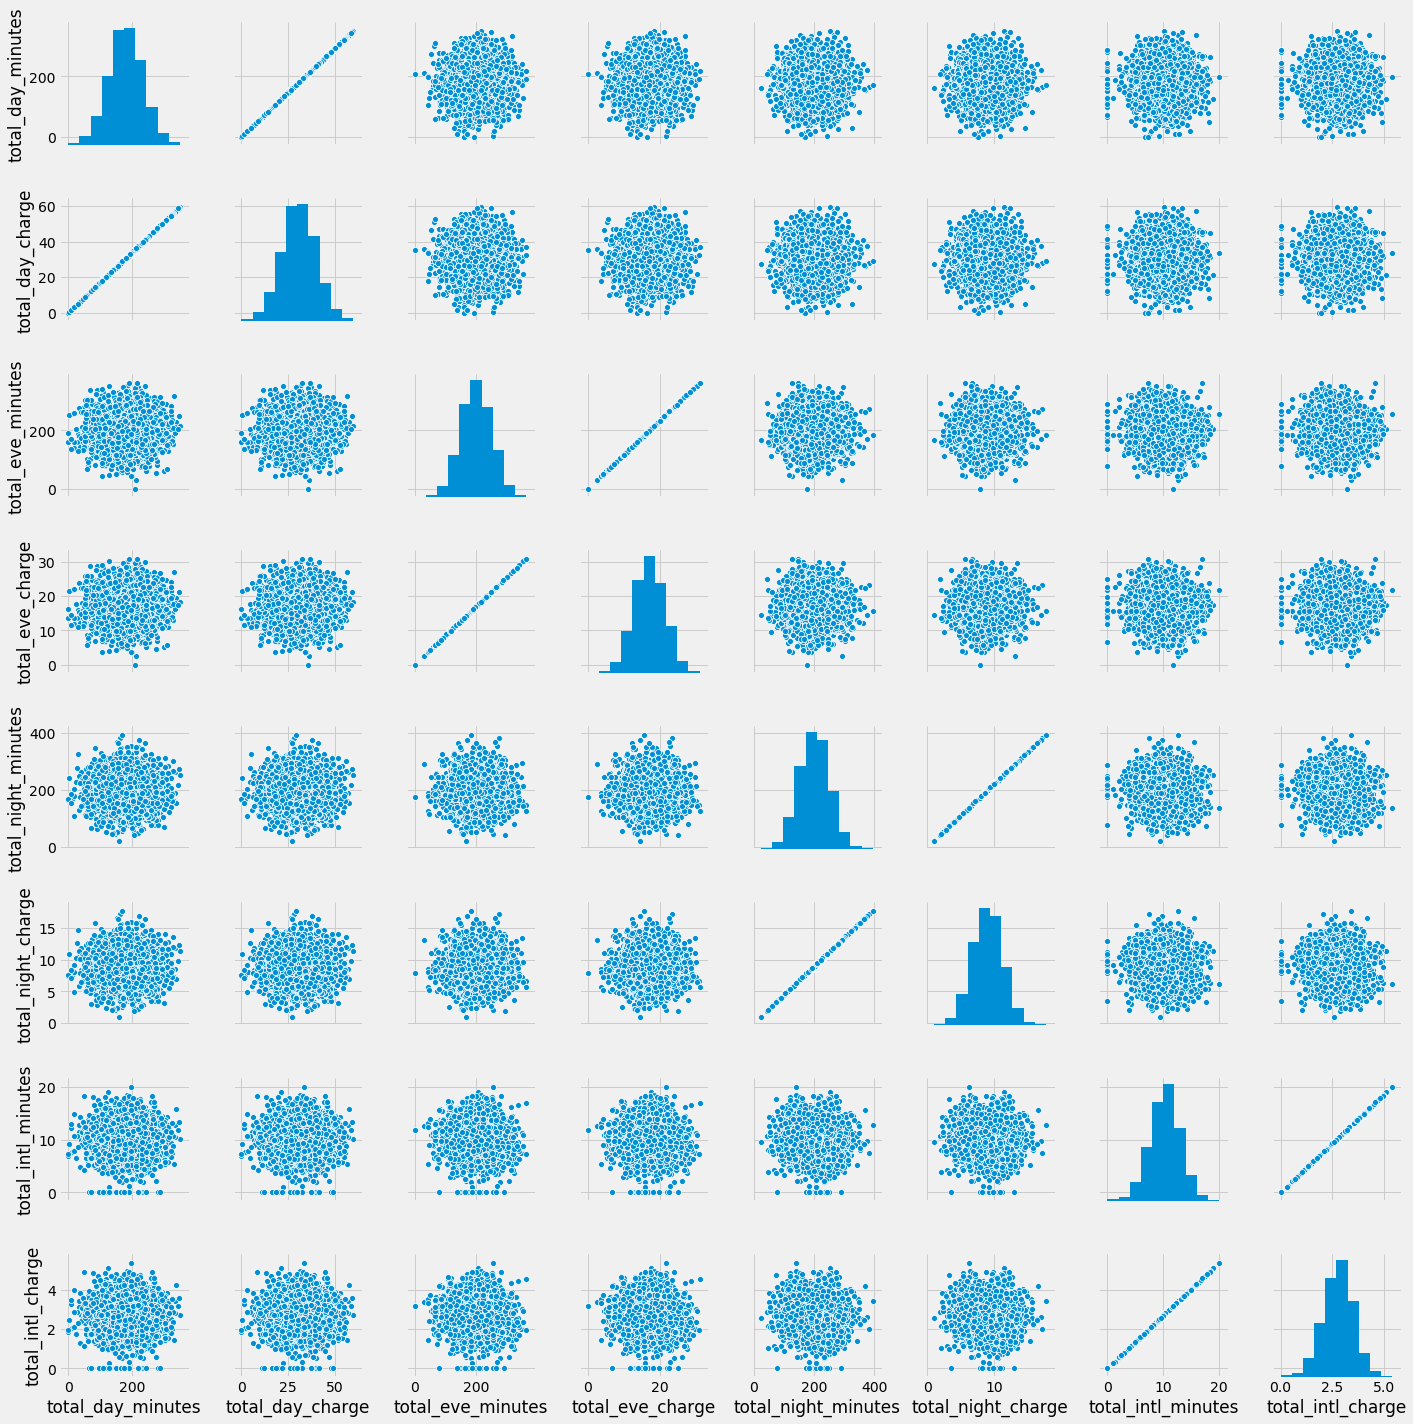

In [32]:
sns.pairplot(data[colinear])

we can see from the diagram above how correlated these columns to other columns, multicolineriaty columns are listed below with their p_value to other columns:

total_day_charge is highly correlated with total_day_minutes (ρ = 1),
total_eve_charge is highly correlated with total_eve_minutes (ρ = 1),
total_intl_charge is highly correlated with total_intl_minutes (ρ = 0.99999),
total_night_charge is highly correlated with total_night_minutes (ρ = 1)

In [141]:
# Remove Collinear Features
for col in data.columns:
    if 'charge' in col:
        data = data.drop([col], axis = 1)

It's obvious that our dataset has no missing values

In [34]:
# lets check if there is any missing value
data.isnull().values.any()

False

there is no missing values in our data

__Distributions__: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.


In [148]:
num = [col for col in data.columns if 'total' in col or 'vmail' in col or 'customer' in col]
data[num].head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls
0,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,0,166.7,113,148.3,122,186.9,121,10.1,3,3


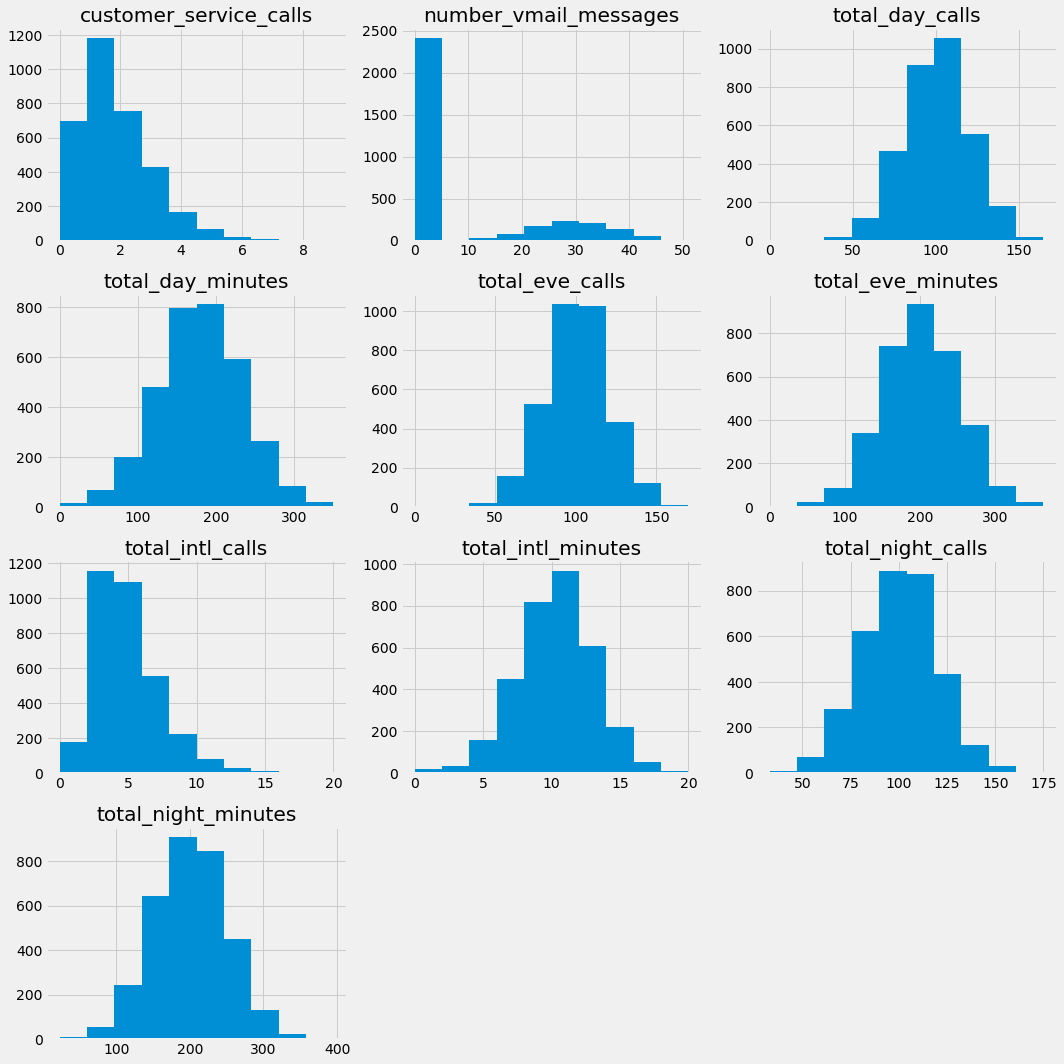

In [36]:
plt.style.use('fivethirtyeight')
data[num].hist(figsize = (15,15))
plt.tight_layout()
plt.show()

Well this shows us we have another problem: outliers! Some graph are incredibly skewed like 'number_vmail_messages' column because of the presence of a few message with very high scores. It looks like we will have to take a slight detour to deal with the outliers. Let's look at the stats for this feature.

In [37]:
data['number_vmail_messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: number_vmail_messages, dtype: float64

In [39]:
data['number_vmail_messages'].sort_values().tail(10)

2608    46
1797    47
3154    47
1441    47
277     48
268     48
1596    49
2716    50
2887    50
845     51
Name: number_vmail_messages, dtype: int64

The outliers in this column represent real observations (i.e. not errors)

__Scaling and Distributing__
In this phase of our kernel, we will first scale the columns comprise of 'total' and 'vmail' . This columns should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Churn and Non-churn cases, helping our algorithms better understand patterns that determines whether a customer will churn or not.

In [111]:
# We should scale the columns that are left to scale
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

for col in data.columns:
    if ('total' in col or 'vmail' in col):
        data[col]= rob_scaler.fit_transform(data[col].values.reshape(-1,1))

In [52]:
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,1.25,1.178817,0.333333,-0.058224,-0.037037,0.636896,-0.346154,-0.083333,-0.333333,1,False
1,OH,107,415,371-7191,no,yes,1.30,-0.244842,0.814815,-0.085881,0.111111,0.778917,0.115385,0.944444,-0.333333,1,False
2,NJ,137,415,358-1921,no,no,0.00,0.880330,0.481481,-1.167394,0.370370,-0.565154,0.153846,0.527778,0.333333,0,False
3,OH,84,408,375-9999,yes,no,0.00,1.650619,-1.111111,-2.030568,-0.444444,-0.062958,-0.423077,-1.027778,1.000000,2,False
4,OK,75,415,330-6626,yes,no,0.00,-0.174691,0.444444,-0.772926,0.814815,-0.209370,0.807692,-0.055556,-0.333333,3,False


## Visualization of our target column

In [53]:
data['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

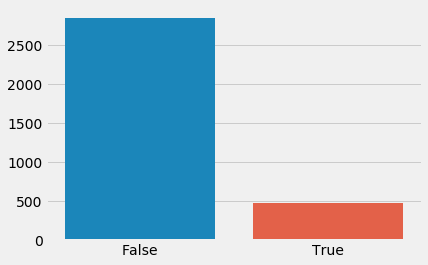

In [19]:
plt.style.use('fivethirtyeight')
churn = data['churn'].value_counts()
sns.barplot(churn.index, churn.values)

__Note:__
Notice how imbalanced is our original dataset! Most of the cutomers are not churn. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most customers are not churn. But we don't want our model to assume, we want our model to detect patterns that give signs of churn!


__What is a sub-Sample?__

In this scenario, our subsample will be a dataframe with a 50/50 ratio of churn and non-churn customers. Meaning our sub-sample will have the same amount of churn and non churn customers.

__Why do we create a sub-Sample?__

We saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues: __OverFitting and Wrong Correlation__


There are 483 cases of churn in our dataset so we can randomly get 483 cases of non-churn to create our new sub dataframe.
We concat the 483 cases of churn and non churn to create a new sub-sample. 

In [112]:
# Under Sampling Imbalance Data
data = data.sample(frac = 1, random_state = 42)
churn = data[data.churn == True]
non_churn = data[data.churn == False].sample(n = 483, random_state = 42)
new_data = pd.concat([churn, non_churn])
new_data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
1345,SD,98,415,392-2555,no,no,0.0,-2.467675,-3.740741,-0.608443,1.111111,-0.499268,-0.461538,-0.972222,-1.000000,4,True
1736,NV,115,415,334-5029,no,no,0.0,1.471802,0.888889,0.062591,-0.962963,-0.143485,1.576923,-0.944444,0.666667,1,True
787,NJ,24,408,393-7826,no,no,0.0,1.185695,-0.555556,0.107715,0.074074,-0.273792,0.192308,0.222222,0.666667,2,True
3169,ID,78,415,332-2650,no,no,0.0,-1.044017,0.518519,-1.215429,0.074074,-0.002928,-0.230769,0.472222,-0.333333,4,True
2889,CT,93,415,404-4809,no,no,0.0,1.261348,0.000000,0.524017,1.222222,-0.816984,0.115385,-0.527778,0.666667,1,True


In [113]:
# Shuffle dataframe rows
new_data = new_data.sample(frac = 1, random_state = 42)

In [114]:
# recheck the value of our target column
new_data.churn.value_counts()

True     483
False    483
Name: churn, dtype: int64

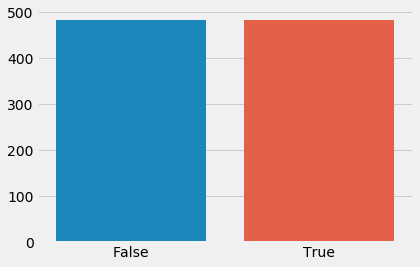

In [57]:
new = new_data.churn.value_counts()
sns.barplot(new.index, new.values)

Now that we have our dataframe correctly balanced, we can go further with our analysis

__Correlation Matrices__

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific customer will churn. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to customer churn.

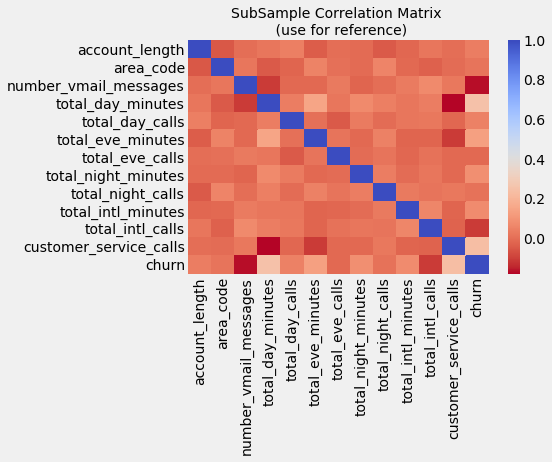

In [40]:
# Make sure we use the subsample in our correlation

new_data_corr = new_data.corr()
sns.heatmap(new_data_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

plt.show()



In [41]:
new_data.corr()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
account_length,1.000000,-0.047437,0.002223,0.020088,0.044942,-0.038250,0.004229,-0.004541,-0.041143,-0.017416,0.022821,0.003058,0.040625
area_code,-0.047437,1.000000,0.022810,-0.044724,-0.019110,0.053649,0.007520,-0.007091,0.059375,-0.009768,-0.027119,-0.001807,0.016427
number_vmail_messages,0.002223,0.022810,1.000000,-0.107378,-0.012452,-0.013161,0.030171,-0.021117,0.001182,0.037136,0.072777,0.026986,-0.167206
total_day_minutes,0.020088,-0.044724,-0.107378,1.000000,0.038096,0.150047,0.023506,0.073380,0.044813,0.019225,0.041341,-0.179064,0.249323
total_day_calls,0.044942,-0.019110,-0.012452,0.038096,1.000000,0.008833,-0.041988,0.037086,0.000363,0.021346,0.024896,-0.015549,0.047784
total_eve_minutes,-0.038250,0.053649,-0.013161,0.150047,0.008833,1.000000,0.016099,-0.011776,0.050818,-0.019335,-0.019218,-0.107728,0.135006
total_eve_calls,0.004229,0.007520,0.030171,0.023506,-0.041988,0.016099,1.000000,-0.001432,0.018391,-0.016420,0.010134,-0.011847,-0.010511
total_night_minutes,-0.004541,-0.007091,-0.021117,0.073380,0.037086,-0.011776,-0.001432,1.000000,0.040087,-0.003387,0.021216,-0.010196,0.087722
total_night_calls,-0.041143,0.059375,0.001182,0.044813,0.000363,0.050818,0.018391,0.040087,1.000000,0.030468,0.017348,0.023849,0.012389
total_intl_minutes,-0.017416,-0.009768,0.037136,0.019225,0.021346,-0.019335,-0.016420,-0.003387,0.030468,1.000000,0.061650,-0.021275,0.077102


In [35]:
new_data.corr()['churn'].sort_values(ascending = False)

churn                     1.000000
total_day_minutes         0.249323
customer_service_calls    0.236972
total_eve_minutes         0.135006
total_night_minutes       0.087722
total_intl_minutes        0.077102
total_day_calls           0.047784
account_length            0.040625
area_code                 0.016427
total_night_calls         0.012389
total_eve_calls          -0.010511
total_intl_calls         -0.108608
number_vmail_messages    -0.167206
Name: churn, dtype: float64

__Negative Correlations:__ total_eve_calls, total_intl_calls and number_vmail_messages are negatively correlated to our target column. Notice how the lower these values are, the more likely the end result will be a non churn customer.

__Positive Correlations:__ Other columns are positively correlated. Notice how the higher these values are, the more likely the end result will be a churn customer.


BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in churn and non churn customers.

In [19]:
data.columns.values

array(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
       'total_eve_calls', 'total_night_minutes', 'total_night_calls',
       'total_intl_minutes', 'total_intl_calls', 'customer_service_calls',
       'churn'], dtype=object)

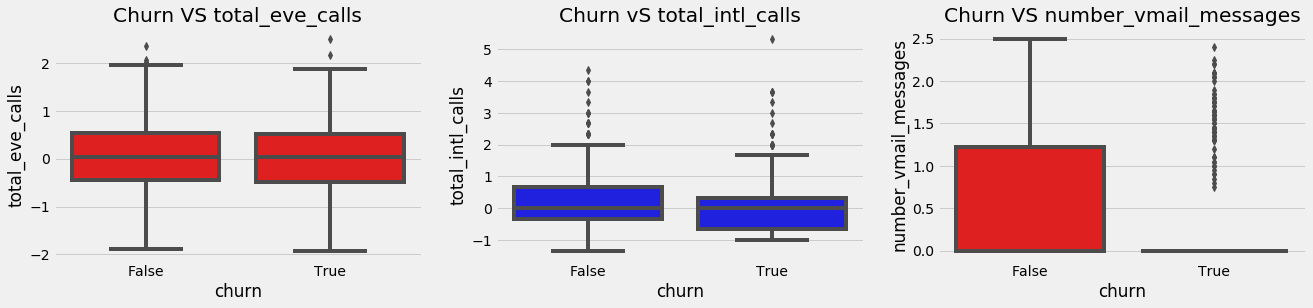

In [115]:
# Negative Correlations with churn columns
plt.style.use('fivethirtyeight')
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = new_data['churn'], y = new_data['total_eve_calls'], color = 'r', ax = axes[0])
axes[0].set_title('Churn VS total_eve_calls')

sns.boxplot(x = new_data['churn'], y = new_data['total_intl_calls'], color = 'b', ax = axes[1])
axes[1].set_title('Churn vS total_intl_calls')

sns.boxplot(x = new_data['churn'], y = new_data['number_vmail_messages'], color = 'r', ax = axes[2])
axes[2].set_title('Churn VS number_vmail_messages')


plt.show()

In [44]:
new_data.head(3)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
792,NV,69,510,397-6789,yes,yes,1.65,1.266850,-0.111111,0.756914,0.074074,-0.524158,-0.576923,-0.583333,-0.666667,1,True
3112,AR,115,415,385-7157,no,no,0.00,-0.551582,-0.444444,-0.132460,-0.185185,-0.734993,-0.961538,-0.277778,-0.333333,7,True
823,PA,77,510,346-6941,no,yes,1.20,-0.412655,-1.000000,-1.128093,-1.037037,-0.393851,-0.615385,-0.055556,0.666667,1,False


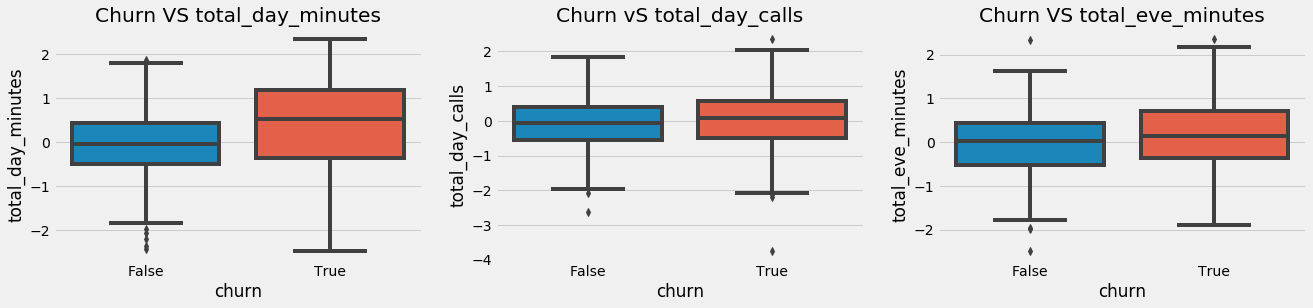

In [116]:
# Possitive Correlations with churn column

plt.style.use('fivethirtyeight')
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = new_data['churn'], y = new_data['total_day_minutes'], ax = axes[0])
axes[0].set_title('Churn VS total_day_minutes')

sns.boxplot(x = new_data['churn'], y = new_data['total_day_calls'], ax = axes[1])
axes[1].set_title('Churn vS total_day_calls')

sns.boxplot(x = new_data['churn'], y = new_data['total_eve_minutes'], ax = axes[2])
axes[2].set_title('Churn VS total_eve_minutes')


plt.show()

Text(0.5, 1.0, 'Churn vS total_intl_minutes')

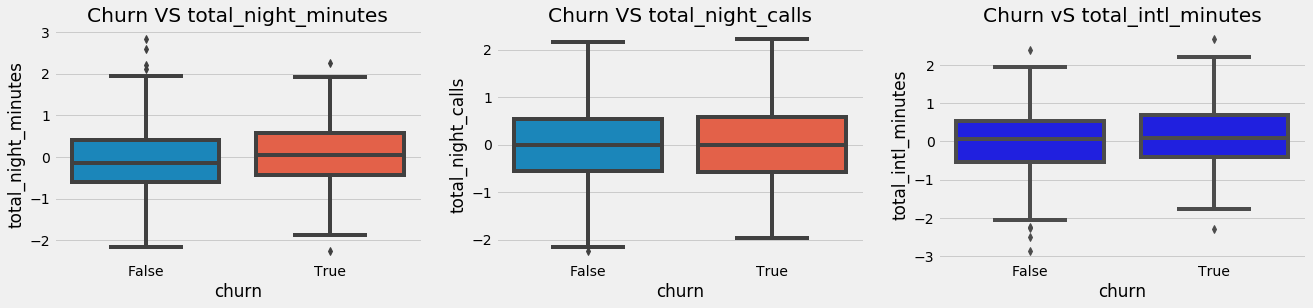

In [117]:
# Possitive Correlations with churn column

plt.style.use('fivethirtyeight')
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = new_data['churn'], y = new_data['total_night_minutes'], ax = axes[0])
axes[0].set_title('Churn VS total_night_minutes')

sns.boxplot(x = new_data['churn'], y = new_data['total_night_calls'], ax = axes[1])
axes[1].set_title('Churn VS total_night_calls')

sns.boxplot(x = new_data['churn'], y = new_data['total_intl_minutes'], color = 'b', ax = axes[2])
axes[2].set_title('Churn vS total_intl_minutes')


Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models. 


__Outlier Removal Tradeoff:__

We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect. 

In [118]:
# Calculate first and third quartile for total_eve_calls column
first_quartile = new_data['total_eve_calls'].describe()['25%']
third_quartile = new_data['total_eve_calls'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
new_data = new_data[(new_data['total_eve_calls'] > (first_quartile - 1.5 * iqr)) &
                   (new_data['total_eve_calls'] < (third_quartile + 1.5 * iqr))]


# Calculate first and third quartile dor total_intl_calls column
first_quartile = new_data['total_intl_calls'].describe()['25%']
third_quartile = new_data['total_intl_calls'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
new_data = new_data[(new_data['total_intl_calls'] > (first_quartile - 1.5 * iqr)) &
                   (new_data['total_intl_calls'] < (third_quartile + 1.5 * iqr))]


# Calculate first and third quartile for total_day_minutes column
first_quartile = new_data['total_day_minutes'].describe()['25%']
third_quartile = new_data['total_day_minutes'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
new_data = new_data[(new_data['total_day_minutes'] > (first_quartile - 1.5 * iqr)) &
                   (new_data['total_day_minutes'] < (third_quartile + 1.5 * iqr))]


# Calculate first and third quartile dor total_day_calls column
first_quartile = new_data['total_day_calls'].describe()['25%']
third_quartile = new_data['total_day_calls'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
new_data = new_data[(new_data['total_day_calls'] > (first_quartile - 1.5 * iqr)) &
                   (new_data['total_day_calls'] < (third_quartile + 1.5 * iqr))]


# Calculate first and third quartile for total_eve_minutes
first_quartile = new_data['total_eve_minutes'].describe()['25%']
third_quartile = new_data['total_eve_minutes'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
new_data = new_data[(new_data['total_eve_minutes'] > (first_quartile - 1.5 * iqr)) &
                   (new_data['total_eve_minutes'] < (third_quartile + 1.5 * iqr))]

# Calculate first and third quartile for total_night_minutes column
first_quater = new_data['total_night_minutes'].describe()['25%']
third_quater = new_data['total_night_minutes'].describe()['75%']

# Interquartile range
iqr = third_quater - first_quater

# Remove outliers
new_data = new_data[(new_data['total_night_minutes'] > (first_quater - 1.5 * iqr)) &
                   (new_data['total_night_minutes'] < (third_quater + 1.5 * iqr))]

# Calculate first and third quartile for total_intl_minutes column
first_quartile = new_data['total_intl_minutes'].describe()['25%']
third_quartile = new_data['total_intl_minutes'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
new_data = new_data[(new_data['total_intl_minutes'] > (first_quartile - 1.5 * iqr)) &
                   (new_data['total_intl_minutes'] < (third_quartile + 1.5 * iqr))]

__Pairs Plot__

As a final exercise for exploratory data analysis, we can make a pairs plot between several different variables. The Pairs Plot is a great way to examine many variables at once as it shows scatterplots between pairs of variables and histograms of single variables on the diagonal.

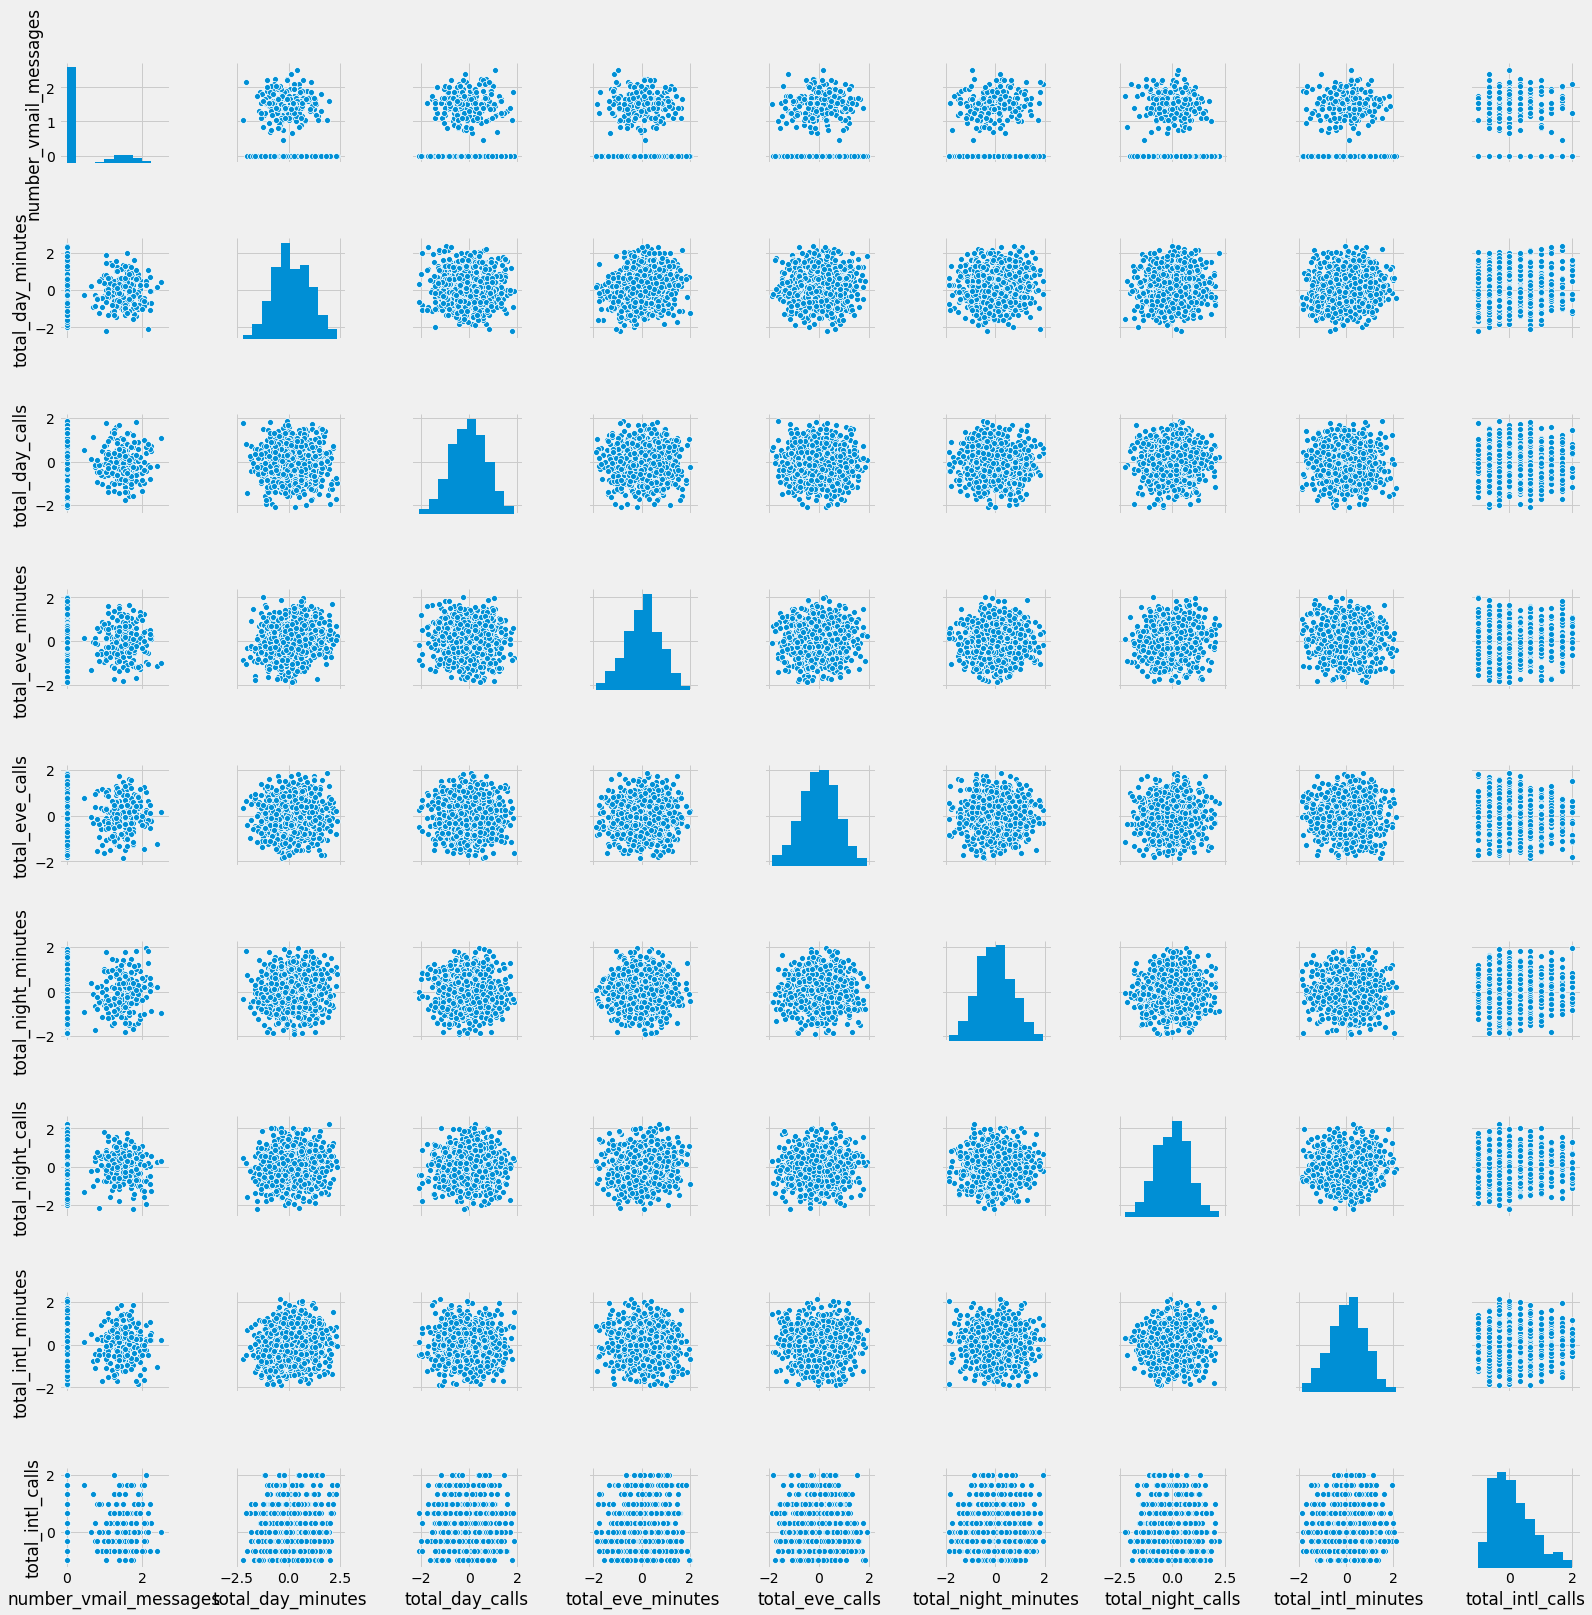

In [70]:
plt.style.use('fivethirtyeight')
sns.pairplot(new_data, vars = ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
                              'total_eve_calls','total_night_minutes', 'total_night_calls',
                              'total_intl_minutes', 'total_intl_calls'], dropna =True)


It is obvious that our features columns are not correlated to each other

#### Dealing with Categorical columns

In [58]:
# dealing with categorical columns 
new_data.select_dtypes('object').head(4)

,state,phone_number,international_plan,voice_mail_plan
792,NV,397-6789,yes,yes
3112,AR,385-7157,no,no
823,PA,346-6941,no,yes
2898,CT,345-2476,no,no


you may have noticed from the above data(info), that we have 4 object types, and 3 of these object types are useful for our 
analysis. The other object column is phone_number which, you guessed it, is a customer’s phone number. A person’s phone number shouldn’t have any great bearing on whether they decide to stick with a phone company, so for this reason, I choose to simply drop this column from our feature set.

In [19]:
# checking the number of values in 'international_plan' columns
data['international_plan'].value_counts()

no     2411
yes     922
Name: voice_mail_plan, dtype: int64

In [58]:
# checking the number of values in 'voice_mail_plan' columns
data['voice_mail_plan'].value_counts()

no     2411
yes     922
Name: voice_mail_plan, dtype: int64

In [59]:
# number of unique values in state
data['state'].nunique()

51

In [59]:
# checking the number of values in 'state' columns
#data['state'].value_counts()

In [119]:
# lets drop phone number columns
new_data = new_data.drop(['phone_number'], axis = 1)

In [120]:
# create dummy variables for categorical columns
new_data = pd.get_dummies(new_data)
#data

In [63]:
#new_data.info()

### Create Target and Features Variables:

In [121]:
# Target column:
y = new_data.churn

# features columns
x = new_data.drop('churn', axis = 1)

### Train-Test Split:

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [31]:
x_train.columns.values

array(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
       'total_eve_calls', 'total_night_minutes', 'total_night_calls',
       'total_intl_minutes', 'total_intl_calls', 'customer_service_calls',
       'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
       'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY', 'international_plan_no', 'internati

## MODELS

## Model Evaluation using Confusion Matrix

## Model 1: DecisionTreeClassifier

              precision    recall  f1-score   support

   Non-Churn       0.84      0.90      0.87       103
       Churn       0.91      0.85      0.88       120

   micro avg       0.87      0.87      0.87       223
   macro avg       0.87      0.88      0.87       223
weighted avg       0.88      0.87      0.87       223



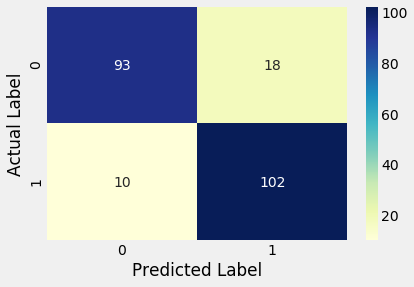

In [125]:
# instantiate decision tree object with default params
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 42)

dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)
CM = confusion_matrix(pred, y_test)

sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-Churn', 'Churn']
print(classification_report(y_test, pred, target_names=labels))

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 698 and 82 are actual predictions, and 43 and 11 are incorrect predictions. 

Well, you got a classification rate of 94%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your  Decision Tree Classifier model predicted customer churn, that means customers will churn 89% of the time.

Recall: If there are customers who churned in the test set and your Decision Tree Classifier model can identify it 65% of the time.

Remember, for this problem, we care more about recall score since we want to catch false negatives. Recall is what we want to try to maximise from this model.

## Model 2: Random Forest

              precision    recall  f1-score   support

   Non-Churn       0.89      0.85      0.87       103
       Churn       0.88      0.91      0.89       120

   micro avg       0.88      0.88      0.88       223
   macro avg       0.88      0.88      0.88       223
weighted avg       0.88      0.88      0.88       223



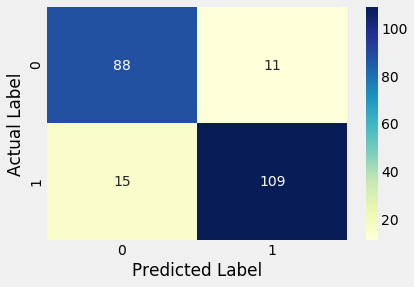

In [137]:
# instantiate Random Forest object with default params
RF  = RandomForestClassifier(n_estimators = 100, max_depth= 5, random_state = 42)
RF.fit(x_train, y_train)

# prediction
pred =RF.predict(x_test)
CM = confusion_matrix(pred, y_test)

sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-Churn', 'Churn']
print(classification_report(y_test, pred, target_names=labels))

Our accuracy score has actually gone down from our first model. Let’s check recall:

our recall score has gone way down for our random forrest model! 

## Model 3: AdaBoosting

              precision    recall  f1-score   support

   Non-Churn       0.77      0.80      0.78       103
       Churn       0.82      0.79      0.81       120

   micro avg       0.79      0.79      0.79       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.79      0.79      0.79       223



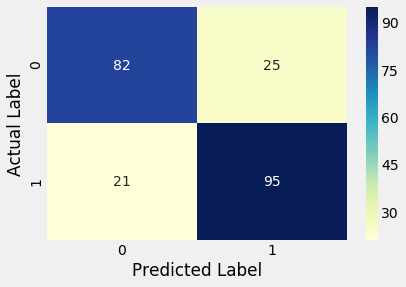

In [133]:

# instantiate adaboost classifier object
ABC = AdaBoostClassifier(random_state = 15)

# fit the model to the training data:
ABC.fit(x_train, y_train)

# prediction
pred =ABC.predict(x_test)
CM = confusion_matrix(pred, y_test)

sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-Churn', 'Churn']
print(classification_report(y_test, pred, target_names=labels))

Our recall score has improved somewhat significantly from the random forest model.

## Model 4: Gradient Boosting

              precision    recall  f1-score   support

   Non-Churn       0.88      0.89      0.88       103
       Churn       0.91      0.89      0.90       120

   micro avg       0.89      0.89      0.89       223
   macro avg       0.89      0.89      0.89       223
weighted avg       0.89      0.89      0.89       223



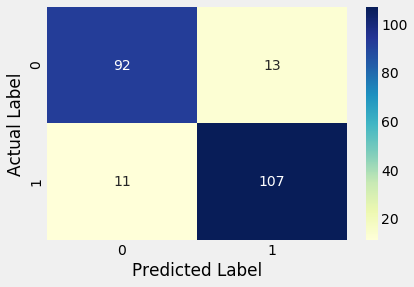

In [135]:
# instantiate gradient boost classifier object
GBC = GradientBoostingClassifier(random_state = 15)

# fit the model to the training data:
GBC.fit(x_train, y_train)

# prediction
pred =GBC.predict(x_test)
CM = confusion_matrix(pred, y_test)

sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-Churn', 'Churn']
print(classification_report(y_test, pred, target_names=labels))

Our highest accuracy scores so far. They’re not too far away from our first decision tree model. There’s also no significant evidence of overfitting on preliminary inspection.

Once again, our highest recall score so far and this does outperform our first model significantly.

Given these 4 models, we would choose the gradient boosting model as our best.

## Conclusion

1. Good prediction results can be achieved with imbalanced datasets as well as with balanced ones
2. XGBoost Classifiers gave us the best results being able to detect more than 90% churned customers and at the same time not classifying a lot of non-churn customers as churned
3. There is no perfect model and there will always be a trade-off between precision and recall. It is up to the company and its objectives to decide which approach is the best in each particular situation
